In [2]:
from numpy import load
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.pyplot import gca
import numpy as np

folder = "dumper8/"#"experiment39/"

hmc_av_accept_probs   = load(folder + "HMC_AP.npy")
rmhmc_av_accept_probs = load(folder + "RMHMC_AP.npy")
chmc_av_accept_probs  = load(folder + "CHMC_AP.npy")
hug_av_accept_probs   = load(folder + "HUG_AP.npy")
thug_av_accept_probs  = load(folder + "THUG_AP.npy")
hug_av_accept_probsL  = load(folder + "HUGL_AP.npy")
thug_av_accept_probsL = load(folder + "THUGL_AP.npy")
hmc_av_accept_probsL  = load("experiment39/" + "HMC-L.npy")
σ_grid                = load(folder + "SIGMA_GRID.npy")
ϵ_grid                = load(folder + "EPSILON_GRID.npy")
αs                    = load(folder + "ALPHAS.npy")

# New Stuff 25 november 2022

In [23]:
#### C-RWM STUFF
folder2 = "experiment39b/"
crwm_av_accept_probs  = load(folder2 + "CRWM_AP.npy")
crwm_av_njacob_evals  = load(folder2 + "CRWM_NGRAD.npy")

In [37]:
#### C-RWM RATTLE!!!
folder3 = "experiment39c/"
crwm_rattle_av_accept_probs = load(folder3 + "CRWM_AP.npy")
crwm_rattle_av_njacob_evals = load(folder3 + "CRWM_NGRAD.npy")

# End of new Stuff

In [4]:
def plot_statistic_heatmap(
        σ_grid, ϵ_grid, statistic_grid, ax=None, title=None, colorbar=True, return_artist=False, shrink=1.0,fontfamily='STIXGeneral', titlesize=20):
    rc('font',**{'family':'STIXGeneral'})
    fig, ax = create_fig_if_none(ax, figsize=(5, 4))
    artist = ax.imshow(statistic_grid.T, vmin=0, vmax=1, origin='lower')
    ax.set_xlabel('$\sigma$', fontfamily=fontfamily)
    ax.set_ylabel('$\delta$', fontfamily=fontfamily)
    ax.set_title(title, fontfamily=fontfamily, fontsize=titlesize)
    ax.set_aspect(1)
    ax.set_xticks(np.arange(σ_grid.shape[0])[::2])
    ax.set_xticklabels([f'$10^{{{int(i)}}}$' for i in np.log10(σ_grid[::2])], fontname='STIXGeneral')
    ax.set_yticks(np.arange(ϵ_grid.shape[0])[::2])
    ax.set_yticklabels([f'$10^{{{int(i)}}}$' for i in np.log10(ϵ_grid[::2])], fontname='STIXGeneral')
#     ax.set(xlabel='$\sigma$', 
#            ylabel='$\delta$',
#            title=title, aspect=1, 
#            xticks=np.arange(σ_grid.shape[0])[::2],
#            xticklabels=[f'$10^{{{int(i)}}}$' for i in np.log10(σ_grid[::2])],
#            yticks=np.arange(ϵ_grid.shape[0])[::2], 
#            yticklabels=[f'$10^{{{int(i)}}}$' for i in np.log10(ϵ_grid[::2])],
#            fontfamily=fontfamily)
    if colorbar:
        fig.colorbar(artist, ax=fig.axes, shrink=shrink)
    if return_artist:
        return fig, ax, artist
    else:
        return fig, ax

def create_fig_if_none(ax, **fig_kw):
    if ax is None:
        fig, ax = plt.subplots(**fig_kw)
    else:
        fig = ax.figure
    return fig, ax

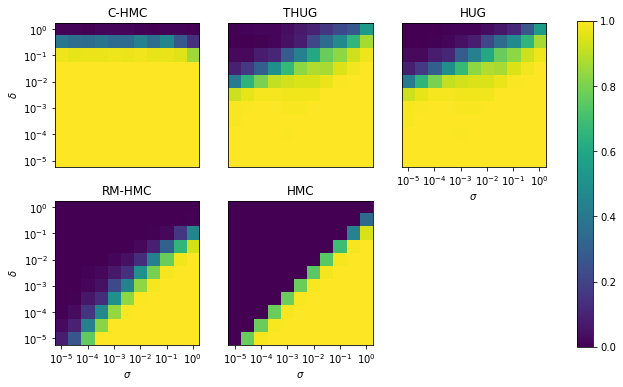

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(11, 6))
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, chmc_av_accept_probs, title='C-HMC', ax=ax[0, 0])
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, thug_av_accept_probs, title='THUG', ax=ax[0, 1], colorbar=False)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hug_av_accept_probs, title='HUG', ax=ax[0, 2], colorbar=False)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, rmhmc_av_accept_probs, title='RM-HMC', ax=ax[1, 0], colorbar=False)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hmc_av_accept_probs, title='HMC', ax=ax[1, 1], colorbar=False)
ax[0, 0].set_xticks([])
ax[0, 0].set_xlabel("")
ax[0, 1].set_xticks([])
ax[0, 1].set_xlabel("")
ax[0, 1].set_yticks([])
ax[0, 1].set_ylabel("")
ax[0, 2].set_yticks([])
ax[0, 2].set_ylabel("")
ax[1, 1].set_yticks([])
ax[1, 1].set_ylabel("")
ax[1, 2].set_visible(False)
#plt.savefig("figures/bip_true_posterior.png", dpi=100)
plt.show()

In [280]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

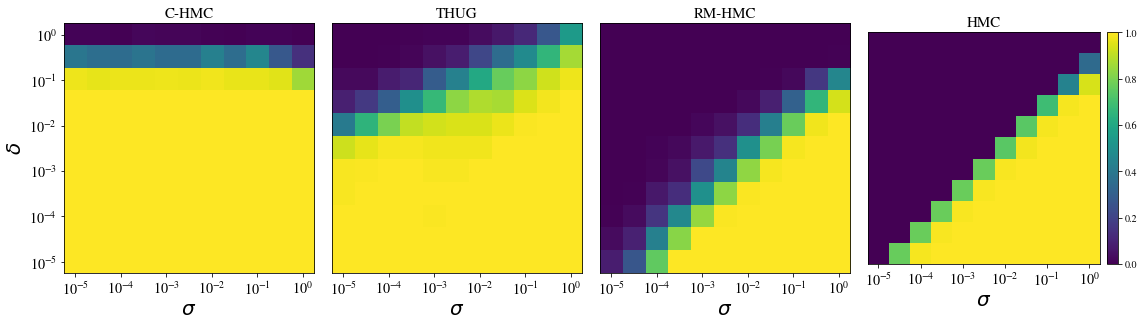

In [294]:
titlesize=15
fig, ax = plt.subplots(ncols=4, figsize=(16, 5))
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, chmc_av_accept_probs, title='C-HMC', ax=ax[0], colorbar=False, shrink=0.5, titlesize=titlesize)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hug_av_accept_probs, title='THUG', ax=ax[1], colorbar=False, titlesize=titlesize)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, rmhmc_av_accept_probs, title='RM-HMC', ax=ax[2], colorbar=False, titlesize=titlesize)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hmc_av_accept_probs, title='HMC', ax=ax[3], colorbar=False, titlesize=titlesize)
ax[1].set_yticks([])
ax[1].set_ylabel("")
ax[2].set_yticks([])
ax[2].set_ylabel("")
ax[3].set_yticks([])
ax[3].set_ylabel("")
ax[0].set_ylabel('$\delta$', fontsize=20, fontname='STIXGeneral')
ax[0].set_yticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
for i in range(4):
    ax[i].set_xlabel('$\sigma$', fontsize=20, family='STIXGeneral', fontname='STIXGeneral')
    ax[i].set_xticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
artist = plt.imshow(hmc_av_accept_probs.T, vmin=0, vmax=1, origin='lower')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(artist, cax=cax)
# ax[1, 0].set_ylabel('$\delta$', fontsize=20)
# ax[1, 0].set_xticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
# ax[1, 1].set_xticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
# ax[0, 0].set_yticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
# ax[0, 0].set_yticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
# ax[1, 0].set_yticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
# # ax[1, 1].set_visible(False)
plt.tight_layout()
# plt.savefig("figures/bip_true_posterior_no_hug_onerow.png", dpi=300)
plt.show()

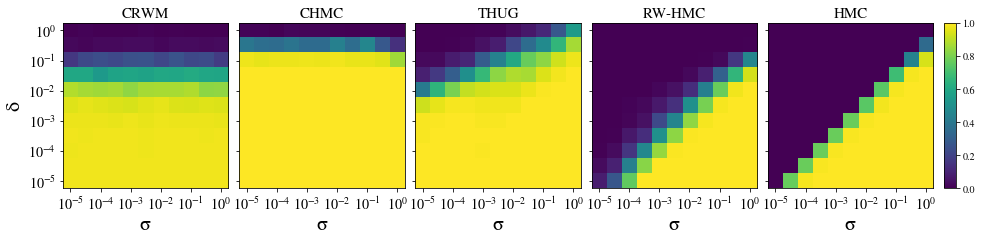

In [24]:
from mpl_toolkits.axes_grid1 import ImageGrid

STUFF = [crwm_av_accept_probs, chmc_av_accept_probs, hug_av_accept_probs, rmhmc_av_accept_probs, hmc_av_accept_probs]
TITLES = ['CRWM', 'CHMC', 'THUG', 'RW-HMC', 'HMC']
# Set up figure and image grid
fig = plt.figure(figsize=(16, 4))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,5),
                 axes_pad=0.15,
                 share_all=False,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

# Add data to image grid
for i, ax in enumerate(grid):
    im = ax.imshow(STUFF[i].T, vmin=0, vmax=1, origin='lower')
    ax.set_xlabel(r'$\mathregular{\sigma}$', fontsize=20, fontname='STIXGeneral')
    ax.set_xticks(range(0, 12, 2))
    ax.set_xticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
    ax.set_title(TITLES[i], fontsize=15, fontname='STIXGeneral')

grid[0].set_yticks(range(0, 12, 2))
grid[0].set_yticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
grid[0].set_ylabel(r'$\mathregular{\delta}$', fontsize=20, fontname='STIXGeneral')
    
# Colorbar
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
#plt.savefig("figures/bip_true_posterior_no_hug_onerow_new.png", dpi=300)
#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.show()

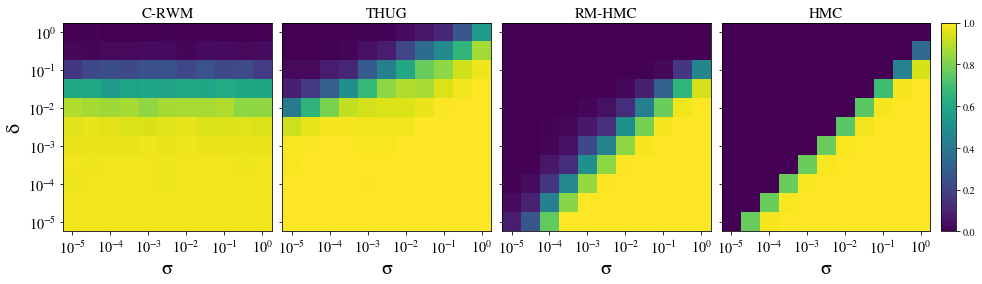

In [28]:
from mpl_toolkits.axes_grid1 import ImageGrid

STUFF = [crwm_av_accept_probs, hug_av_accept_probs, rmhmc_av_accept_probs, hmc_av_accept_probs]
TITLES = ['C-RWM', 'THUG', 'RM-HMC', 'HMC']
# Set up figure and image grid
fig = plt.figure(figsize=(16, 4))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=0.15,
                 share_all=False,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

# Add data to image grid
for i, ax in enumerate(grid):
    im = ax.imshow(STUFF[i].T, vmin=0, vmax=1, origin='lower')
    ax.set_xlabel(r'$\mathregular{\sigma}$', fontsize=20, fontname='STIXGeneral')
    ax.set_xticks(range(0, 12, 2))
    ax.set_xticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
    ax.set_title(TITLES[i], fontsize=15, fontname='STIXGeneral')

grid[0].set_yticks(range(0, 12, 2))
grid[0].set_yticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
grid[0].set_ylabel(r'$\mathregular{\delta}$', fontsize=20, fontname='STIXGeneral')
    
# Colorbar
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
#plt.savefig("figures/bip_true_posterior_no_hug_onerow_new_nochmc.png", dpi=300)
#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.show()

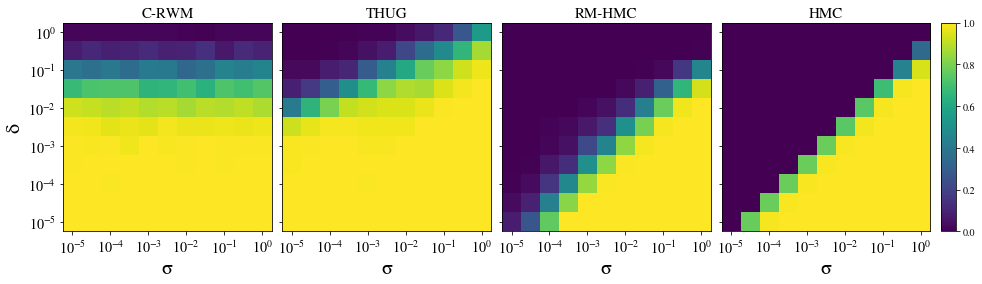

In [39]:
from mpl_toolkits.axes_grid1 import ImageGrid

STUFF = [crwm_rattle_av_accept_probs, hug_av_accept_probs, rmhmc_av_accept_probs, hmc_av_accept_probs]
TITLES = ['C-RWM', 'THUG', 'RM-HMC', 'HMC']
# Set up figure and image grid
fig = plt.figure(figsize=(16, 4))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=0.15,
                 share_all=False,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

# Add data to image grid
for i, ax in enumerate(grid):
    im = ax.imshow(STUFF[i].T, vmin=0, vmax=1, origin='lower')
    ax.set_xlabel(r'$\mathregular{\sigma}$', fontsize=20, fontname='STIXGeneral')
    ax.set_xticks(range(0, 12, 2))
    ax.set_xticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
    ax.set_title(TITLES[i], fontsize=15, fontname='STIXGeneral')

grid[0].set_yticks(range(0, 12, 2))
grid[0].set_yticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
grid[0].set_ylabel(r'$\mathregular{\delta}$', fontsize=20, fontname='STIXGeneral')
    
# Colorbar
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
# plt.savefig("figures/bip_true_posterior_no_hug_onerow_new_nochmc.png", dpi=300)
#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.show()

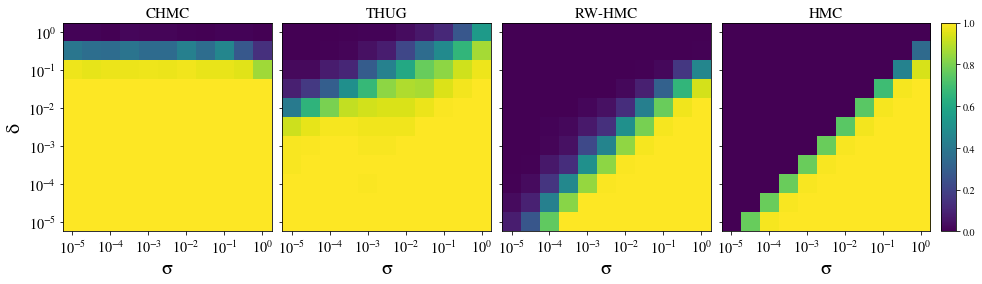

In [353]:
from mpl_toolkits.axes_grid1 import ImageGrid

STUFF = [chmc_av_accept_probs, hug_av_accept_probs, rmhmc_av_accept_probs, hmc_av_accept_probs]
TITLES = ['CHMC', 'THUG', 'RW-HMC', 'HMC']
# Set up figure and image grid
fig = plt.figure(figsize=(16, 4))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=0.15,
                 share_all=False,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

# Add data to image grid
for i, ax in enumerate(grid):
    im = ax.imshow(STUFF[i].T, vmin=0, vmax=1, origin='lower')
    ax.set_xlabel(r'$\mathregular{\sigma}$', fontsize=20, fontname='STIXGeneral')
    ax.set_xticks(range(0, 12, 2))
    ax.set_xticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
    ax.set_title(TITLES[i], fontsize=15, fontname='STIXGeneral')

grid[0].set_yticks(range(0, 12, 2))
grid[0].set_yticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
grid[0].set_ylabel(r'$\mathregular{\delta}$', fontsize=20, fontname='STIXGeneral')
    
# Colorbar
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.savefig("figures/bip_true_posterior_no_hug_onerow_new.png", dpi=300)
#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.show()

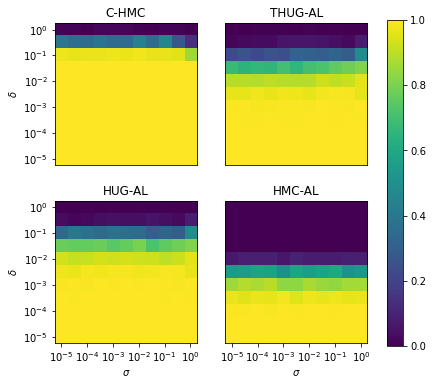

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))

_ = plot_statistic_heatmap(σ_grid, ϵ_grid, chmc_av_accept_probs, title='C-HMC', ax=ax[0, 0])
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, thug_av_accept_probsL, title='THUG', ax=ax[0, 1], colorbar=False)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hug_av_accept_probsL, title='HUG-AL', ax=ax[1, 0], colorbar=False)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hmc_av_accept_probsL, title='HMC-AL', ax=ax[1, 1], colorbar=False)
ax[0, 0].set_xticks([])
ax[0, 0].set_xlabel("")
ax[0, 1].set_xticks([])
ax[0, 1].set_xlabel("")
ax[0, 1].set_yticks([])
ax[0, 1].set_ylabel("")
ax[1, 1].set_yticks([])
ax[1, 1].set_ylabel("")
#plt.savefig("figures/bip_approx_lifted.png", dpi=100)
plt.show()

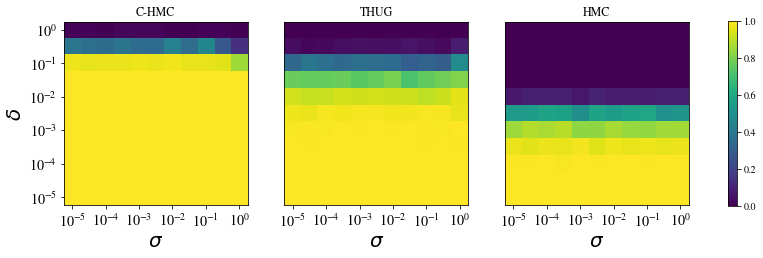

In [220]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

_ = plot_statistic_heatmap(σ_grid, ϵ_grid, chmc_av_accept_probs, title='C-HMC', ax=ax[0], shrink=0.68)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hug_av_accept_probsL, title='THUG', ax=ax[1], colorbar=False) #### HUG
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hmc_av_accept_probsL, title='HMC', ax=ax[2], colorbar=False)
# ax[0].set_xticks([])
# ax[0].set_xlabel("")
# ax[1].set_xticks([])
# ax[1].set_xlabel("")
ax[1].set_yticks([])
ax[1].set_ylabel("")
ax[2].set_yticks([])
ax[2].set_ylabel("")
ax[0].set_ylabel('$\delta$', fontsize=20)
ax[0].set_yticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
for i in range(3):
    ax[i].set_xlabel('$\sigma$', fontsize=20)
    ax[i].set_xticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
plt.savefig("figures/bip_approx_lifted_poster_no_hug.png", dpi=300)
plt.show()

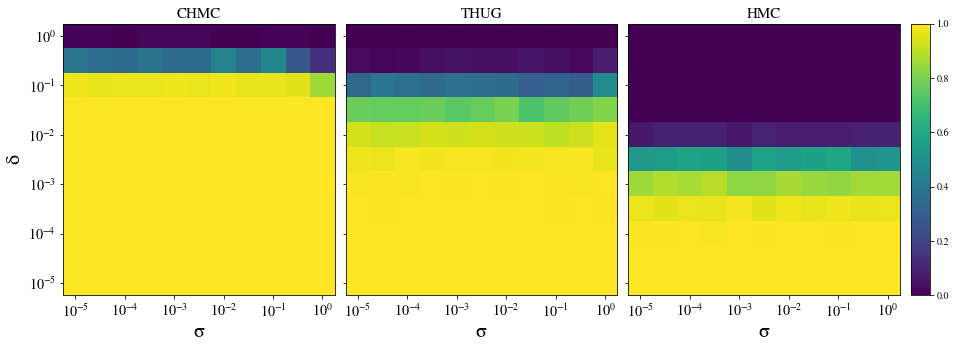

In [359]:
from mpl_toolkits.axes_grid1 import ImageGrid

STUFF = [chmc_av_accept_probs, hug_av_accept_probsL, hmc_av_accept_probsL]
TITLES = ['CHMC', 'THUG', 'HMC']
# Set up figure and image grid
fig = plt.figure(figsize=(16, 5))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=0.15,
                 share_all=False,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

# Add data to image grid
for i, ax in enumerate(grid):
    im = ax.imshow(STUFF[i].T, vmin=0, vmax=1, origin='lower')
    ax.set_xlabel(r'$\mathregular{\sigma}$', fontsize=20, fontname='STIXGeneral')
    ax.set_xticks(range(0, 12, 2))
    ax.set_xticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
    ax.set_title(TITLES[i], fontsize=15, fontname='STIXGeneral')

grid[0].set_yticks(range(0, 12, 2))
grid[0].set_yticklabels([r'$\mathregular{10^{-5}}$', r'$\mathregular{10^{-4}}$', r'$\mathregular{10^{-3}}$', r'$\mathregular{10^{-2}}$', r'$\mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$'], fontname='STIXGeneral', fontsize=14)
grid[0].set_ylabel(r'$\mathregular{\delta}$', fontsize=20, fontname='STIXGeneral')
    
# Colorbar
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.savefig("figures/bip_approx_lifted_poster_no_hug_new.png", dpi=300)
#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.show()

In [209]:
thug_av_accept_probs[:, -1] * 100

array([ 0. ,  0.6,  0.8,  1.8,  4. ,  7.4,  8.2, 15. , 14.6, 26.4, 55.4])

In [210]:
hug_av_accept_probs[:, -1] * 100

array([ 0. ,  0.2,  0. ,  0.4,  0.2,  2.6,  1.8,  7.2, 14.6, 26.4, 55.4])

In [214]:
thug_av_accept_probs[:, -1] * 100

array([ 0.4,  1. ,  1.6,  1.4,  3.6,  7.2, 10. , 16.2, 22.4, 27. , 54.4])

In [216]:
thug_av_accept_probs[0, :] *100

array([100. , 100. , 100. ,  99.2,  99.2,  92.2,  41.4,   8.8,   2.6,
         0.2,   0.4])

In [217]:
hug_av_accept_probs[0, :] *100

array([100. , 100. , 100. ,  99.2,  99.2,  92.2,  41.4,   8.8,   2.6,
         0.2,   0. ])

In [218]:
rmhmc_av_accept_probs[0, :] * 100

array([7.9999653 , 2.79997136, 0.39999084, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

# Prettify Plots

In [8]:
from matplotlib import rc
rc('font',**{'family':'STIXGeneral'})

In [116]:
def plot_statistic_heatmap_pretty(
        σ_grid, ϵ_grid, statistic_grid, ax=None, title=None, colorbar=True, return_artist=False, shrink=1.0, figx=5, figy=4):
    fig, ax = create_fig_if_none(ax, figsize=(figx, figy))
    artist = ax.imshow(statistic_grid.T, vmin=0, vmax=1, origin='lower', aspect='equal')
    ax.set_xlabel('$\mathregular{\sigma}$', fontsize=25)
    ax.set_ylabel('$\mathregular{\delta}$', fontsize=25)
    ax.set_title(title)
    ax.set_xticks(np.arange(σ_grid.shape[0])[::2])
    ax.set_yticks(np.arange(ϵ_grid.shape[0])[::2])
    ax.set_xticklabels([f'$\mathregular{{10^{{{int(i)}}}}}$' for i in np.log10(σ_grid[::2])], fontsize=15)
    ax.set_yticklabels([f'$\mathregular{{10^{{{int(i)}}}}}$' for i in np.log10(ϵ_grid[::2])], fontsize=15)
    #ax.set_aspect('equal')
    if colorbar:
        fig.colorbar(artist, ax=fig.axes, shrink=shrink)
    if return_artist:
        return fig, ax, artist
    else:
        return fig, ax


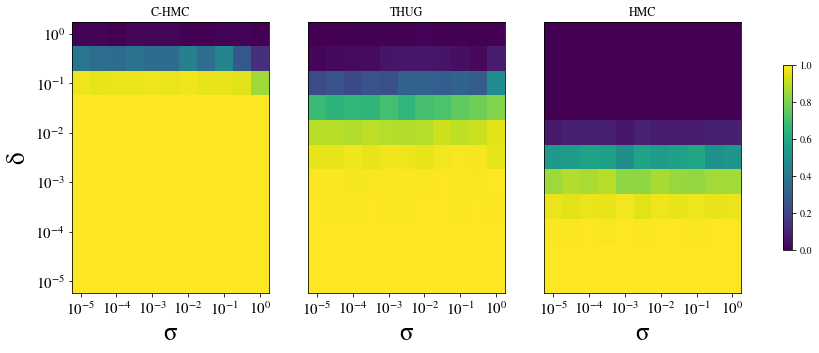

In [115]:
FIGX = 5
FIGY = 4

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

_ = plot_statistic_heatmap_pretty(σ_grid, ϵ_grid, chmc_av_accept_probs, title='C-HMC', ax=ax[0], shrink=0.68, figx=FIGX, figy=FIGY)
_ = plot_statistic_heatmap_pretty(σ_grid, ϵ_grid, thug_av_accept_probsL, title='THUG', ax=ax[1], colorbar=False, figx=FIGX, figy=FIGY)
_ = plot_statistic_heatmap_pretty(σ_grid, ϵ_grid, hmc_av_accept_probsL, title='HMC', ax=ax[2], colorbar=False, figx=FIGX, figy=FIGY)
# ax[0].set_xticks([])
# ax[0].set_xlabel("")
# ax[1].set_xticks([])
# ax[1].set_xlabel("")
ax[1].set_yticks([])
ax[1].set_ylabel("")
ax[2].set_yticks([])
ax[2].set_ylabel("")
#plt.savefig("figures/bip_approx_lifted_poster.png", dpi=500)
#plt.tight_layout()
#plt.subplots_adjust(wspace=0.1)
plt.show()